In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_blobs

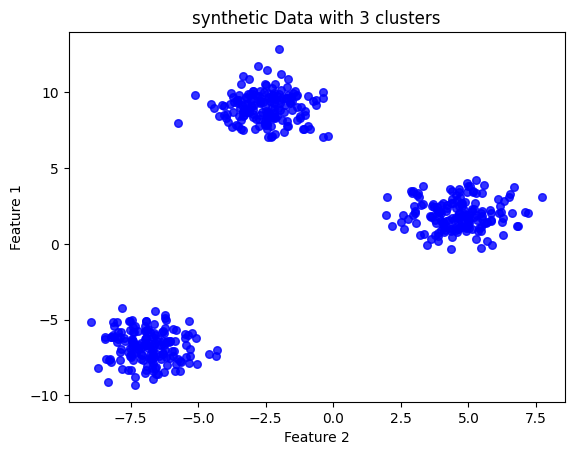

In [13]:
X, y = make_blobs(n_samples=500, cluster_std=1, centers=3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c="b", alpha=0.8, s=30)
plt.title("synthetic Data with 3 clusters")
plt.xlabel("Feature 2")
plt.ylabel("Feature 1")
plt.show()

In [14]:
X_tf = tf.convert_to_tensor(X, dtype=tf.float32)

In [15]:
def kmeans_clustering(X_tf, k, max_iters=100, tol=1e-4):
    centroids = tf.Variable(tf.gather(X_tf, np.random.choice(len(X_tf), k, replace=False)))

    for i in range(max_iters):
        distances = tf.norm(X_tf[:, None] - centroids, axis=2)
        cluster_assignments = tf.argmin(distances, axis=1)
        new_centroids = []
        for j in range(k):
            points_in_cluster = tf.boolean_mask(X_tf, cluster_assignments == j)
            if len(points_in_cluster) > 0:
                new_centroids.append(tf.reduce_mean(points_in_cluster, axis=0))
            else:
                new_centroids.append(centroids[j])
        new_centroids = tf.stack(new_centroids)

        if tf.reduce_max(tf.norm(centroids - new_centroids, axis=1)) < tol:
            break
        centroids.assign(new_centroids)

    return centroids, cluster_assignments



In [20]:
inertia_values = []
for k in range(2, 10):
    centroids, cluster_assignments = kmeans_clustering(X_tf, k)
    distances = tf.norm(X_tf - tf.gather(centroids, cluster_assignments), axis=1)
    inertia = tf.reduce_sum(distances**2).numpy()
    inertia_values.append(inertia)

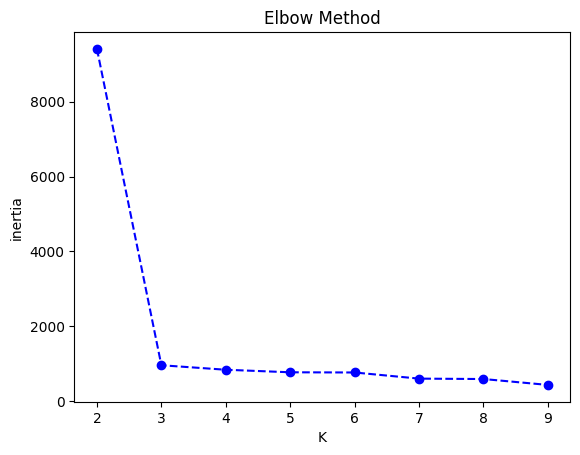

In [21]:
plt.plot(range(2, 10), inertia_values, "bo--")
plt.xlabel("K")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.show()

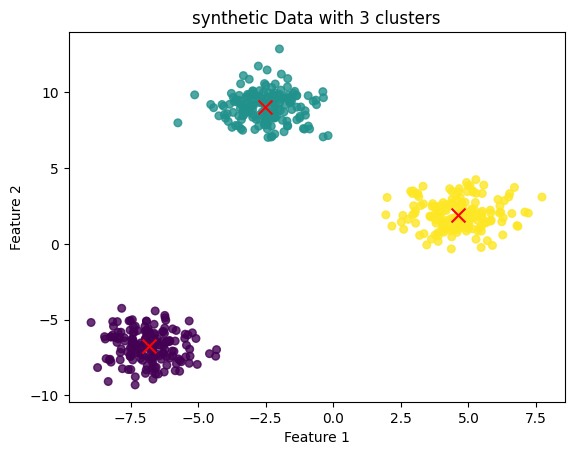

In [22]:
centroids, cluster_assignments = kmeans_clustering(X_tf, 3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, alpha=0.8, s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title("synthetic Data with 3 clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()